<a href="https://colab.research.google.com/github/rajayourfriend/EIP_Assignments/blob/master/EIP4_Assignment4_afresh_01_006_ToSubmit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Find the GPU allocated

In [0]:
!nvidia-smi

Tue Dec 10 18:52:55 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.36       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
from google.colab import drive

TRAINING_REQUIRED = True 
USE_GOOGLE_DRIVE = True #RAJA edit this, if USE_GOOGLE_DRIVE is meant to be False

if USE_GOOGLE_DRIVE:
    TRAINING_REQUIRED = False #RAJA edit this, with USE_GOOGLE_DRIVE being True
    drive.mount('/gdrive')
    !ls '/gdrive/My Drive/Colab Notebooks/saved_weights/'


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
'Copy of eip4_assign4_cifar10.h5'   eip4_assign4_cifar10.h5
 del_eip4_assign4_cifar10.h5


### Display Functions

In [0]:

import matplotlib.pyplot as plt

def displaySampleImages(features, labels):
    class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
    fig = plt.figure(figsize=(8,3))
    for i in range(num_classes):
        ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
        idx = np.where(labels[:]==i)[0]
        features_idx = features[idx,::]
        img_num = np.random.randint(features_idx.shape[0])
        im = features_idx[img_num]
        ax.set_title(class_names[i])
        plt.imshow(im)
    plt.show()

def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

#old code
'''
from keras import backend as K
import time
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConv2D
from keras.layers import Activation, Flatten, Dense, Dropout, GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)
'''

"\nfrom keras import backend as K\nimport time\nimport numpy as np\n% matplotlib inline\nnp.random.seed(2017) \nfrom keras.models import Sequential\nfrom keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConv2D\nfrom keras.layers import Activation, Flatten, Dense, Dropout, GlobalAveragePooling2D\nfrom keras.layers.normalization import BatchNormalization\nfrom keras.utils import np_utils\n\nfrom keras.datasets import cifar10\n(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()\nnum_train, img_channels, img_rows, img_cols =  train_features.shape\nnum_test, _, _, _ =  test_features.shape\nnum_classes = len(np.unique(train_labels))\n\ntrain_features = train_features.astype('float32')/255\ntest_features = test_features.astype('float32')/255\n# convert class labels to binary class labels\ntrain_labels = np_utils.to_categorical(train_labels, num_classes)\ntest_labels = np_utils.to_categorical(test_labels, num_classes)\n"

### Assignment begin

Using TensorFlow backend.


170500096/170498071 [==============================] - 6s 0us/step


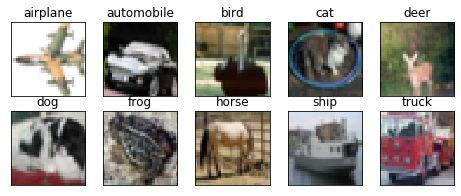

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
y_train shape: (50000, 1)


In [0]:
from __future__ import print_function
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
from keras.datasets import cifar10
import numpy as np
import os

# Training parameters

batch_size = 32  # orig paper trained all networks with batch_size=128
epochs = 50
data_augmentation = True
num_classes = 10

# Subtracting pixel mean improves accuracy
subtract_pixel_mean = True

# Model parameter
# ----------------------------------------------------------------------------
#           |      | 200-epoch | Orig Paper| 200-epoch | Orig Paper| sec/epoch
# Model     |  n   | ResNet v1 | ResNet v1 | ResNet v2 | ResNet v2 | GTX1080Ti
#           |v1(v2)| %Accuracy | %Accuracy | %Accuracy | %Accuracy | v1 (v2)
# ----------------------------------------------------------------------------
# ResNet20  | 3 (2)| 92.16     | 91.25     | -----     | -----     | 35 (---)
# ResNet32  | 5(NA)| 92.46     | 92.49     | NA        | NA        | 50 ( NA)
# ResNet44  | 7(NA)| 92.50     | 92.83     | NA        | NA        | 70 ( NA)
# ResNet56  | 9 (6)| 92.71     | 93.03     | 93.01     | NA        | 90 (100)
# ResNet110 |18(12)| 92.65     | 93.39+-.16| 93.15     | 93.63     | 165(180)
# ResNet164 |27(18)| -----     | 94.07     | -----     | 94.54     | ---(---)
# ResNet1001| (111)| -----     | 92.39     | -----     | 95.08+-.14| ---(---)
# ---------------------------------------------------------------------------
n = 3

# Model version
# Orig paper: version = 1 (ResNet v1), Improved ResNet: version = 2 (ResNet v2)
version = 1

# Computed depth from supplied model parameter n
if version == 1:
    depth = n * 6 + 2
elif version == 2:
    depth = n * 9 + 2

# Model name, depth and version
model_type = 'ResNet%dv%d' % (depth, version)

# Load the CIFAR10 data.
(x_train_org, y_train_org), (x_test_org, y_test_org) = cifar10.load_data()
x_train, y_train, x_test, y_test = x_train_org, y_train_org, x_test_org, y_test_org

# Input image dimensions.
input_shape = x_train.shape[1:]

# Normalize data.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

displaySampleImages(x_train, y_train)

# If subtract pixel mean is enabled
if subtract_pixel_mean:
    x_train_mean = np.mean(x_train, axis=0)
    x_train -= x_train_mean
    x_test -= x_train_mean

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('y_train shape:', y_train.shape)

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:


import shutil

#RAJA changed batch_size from 32 to different values such as 64, 128, etc
epochs = 1 #RAJA later delete it

def lr_schedule(epoch):
    """Learning Rate Schedule

    Learning rate is scheduled to be reduced after 80, 120, 160, 180 epochs.
    Called automatically every epoch as part of callbacks during training.

    # Arguments
        epoch (int): The number of epochs

    # Returns
        lr (float32): learning rate
    """
    lr = 1e-3
    if epoch > 180:
        lr *= 0.5e-3
    elif epoch > 160:
        lr *= 1e-3
    elif epoch > 120:
        lr *= 1e-2
    elif epoch > 80:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr


def resnet_layer(inputs,
                 num_filters=16,
                 kernel_size=3,
                 strides=1,
                 activation='relu',
                 batch_normalization=True,
                 conv_first=True):
    """2D Convolution-Batch Normalization-Activation stack builder

    # Arguments
        inputs (tensor): input tensor from input image or previous layer
        num_filters (int): Conv2D number of filters
        kernel_size (int): Conv2D square kernel dimensions
        strides (int): Conv2D square stride dimensions
        activation (string): activation name
        batch_normalization (bool): whether to include batch normalization
        conv_first (bool): conv-bn-activation (True) or
            bn-activation-conv (False)

    # Returns
        x (tensor): tensor as input to the next layer
    """
    conv = Conv2D(num_filters,
                  kernel_size=kernel_size,
                  strides=strides,
                  padding='same',
                  kernel_initializer='he_normal',
                  kernel_regularizer=l2(1e-4))

    x = inputs
    if conv_first:
        x = conv(x)
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
    else:
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
        x = conv(x)
    return x


def resnet_v1(input_shape, depth, num_classes=10):
    """ResNet Version 1 Model builder [a]

    Stacks of 2 x (3 x 3) Conv2D-BN-ReLU
    Last ReLU is after the shortcut connection.
    At the beginning of each stage, the feature map size is halved (downsampled)
    by a convolutional layer with strides=2, while the number of filters is
    doubled. Within each stage, the layers have the same number filters and the
    same number of filters.
    Features maps sizes:
    stage 0: 32x32, 16
    stage 1: 16x16, 32
    stage 2:  8x8,  64
    The Number of parameters is approx the same as Table 6 of [a]:
    ResNet20 0.27M
    ResNet32 0.46M
    ResNet44 0.66M
    ResNet56 0.85M
    ResNet110 1.7M

    # Arguments
        input_shape (tensor): shape of input image tensor
        depth (int): number of core convolutional layers
        num_classes (int): number of classes (CIFAR10 has 10)

    # Returns
        model (Model): Keras model instance
    """
    if (depth - 2) % 6 != 0:
        raise ValueError('depth should be 6n+2 (eg 20, 32, 44 in [a])')
    # Start model definition.
    num_filters = 16
    num_res_blocks = int((depth - 2) / 6)

    inputs = Input(shape=input_shape)
    x = resnet_layer(inputs=inputs)
    # Instantiate the stack of residual units
    for stack in range(3):
        for res_block in range(num_res_blocks):
            strides = 1
            if stack > 0 and res_block == 0:  # first layer but not first stack
                strides = 2  # downsample
            y = resnet_layer(inputs=x,
                             num_filters=num_filters,
                             strides=strides)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters,
                             activation=None)
            if stack > 0 and res_block == 0:  # first layer but not first stack
                # linear projection residual shortcut connection to match
                # changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = keras.layers.add([x, y])
            x = Activation('relu')(x)
        num_filters *= 2

    # Add classifier on top.
    # v1 does not use BN after last shortcut connection-ReLU
    x = AveragePooling2D(pool_size=8)(x)
    y = Flatten()(x)
    outputs = Dense(num_classes,
                    activation='softmax',
                    kernel_initializer='he_normal')(y)

    # Instantiate model.
    model = Model(inputs=inputs, outputs=outputs)
    return model


def resnet_v2(input_shape, depth, num_classes=10):
    """ResNet Version 2 Model builder [b]

    Stacks of (1 x 1)-(3 x 3)-(1 x 1) BN-ReLU-Conv2D or also known as
    bottleneck layer
    First shortcut connection per layer is 1 x 1 Conv2D.
    Second and onwards shortcut connection is identity.
    At the beginning of each stage, the feature map size is halved (downsampled)
    by a convolutional layer with strides=2, while the number of filter maps is
    doubled. Within each stage, the layers have the same number filters and the
    same filter map sizes.
    Features maps sizes:
    conv1  : 32x32,  16
    stage 0: 32x32,  64
    stage 1: 16x16, 128
    stage 2:  8x8,  256

    # Arguments
        input_shape (tensor): shape of input image tensor
        depth (int): number of core convolutional layers
        num_classes (int): number of classes (CIFAR10 has 10)

    # Returns
        model (Model): Keras model instance
    """
    if (depth - 2) % 9 != 0:
        raise ValueError('depth should be 9n+2 (eg 56 or 110 in [b])')
    # Start model definition.
    num_filters_in = 16
    num_res_blocks = int((depth - 2) / 9)

    inputs = Input(shape=input_shape)
    # v2 performs Conv2D with BN-ReLU on input before splitting into 2 paths
    x = resnet_layer(inputs=inputs,
                     num_filters=num_filters_in,
                     conv_first=True)

    # Instantiate the stack of residual units
    for stage in range(4):
        for res_block in range(num_res_blocks):
            activation = 'relu'
            batch_normalization = True
            strides = 1
            if stage == 0:
                num_filters_out = num_filters_in * 4
                if res_block == 0:  # first layer and first stage
                    activation = None
                    batch_normalization = False
            else:
                num_filters_out = num_filters_in * 2
                if res_block == 0:  # first layer but not first stage
                    strides = 2    # downsample

            # bottleneck residual unit
            y = resnet_layer(inputs=x,
                             num_filters=num_filters_in,
                             kernel_size=1,
                             strides=strides,
                             activation=activation,
                             batch_normalization=batch_normalization,
                             conv_first=False)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters_in,
                             conv_first=False)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters_in,
                             conv_first=False)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters_out,
                             kernel_size=1,
                             conv_first=False)
            if res_block == 0:
                # linear projection residual shortcut connection to match
                # changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters_out,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = keras.layers.add([x, y])

        num_filters_in = num_filters_out

    # Add classifier on top.
    # v2 has BN-ReLU before Pooling
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = AveragePooling2D(pool_size=8)(x)
    y = Flatten()(x)
    outputs = Dense(num_classes,
                    activation='softmax',
                    kernel_initializer='he_normal')(y)

    # Instantiate model.
    model = Model(inputs=inputs, outputs=outputs)
    return model
def model_compile(model):
  model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=lr_schedule(0)),
              metrics=['accuracy'])
  return model

if version == 2:
    model = resnet_v2(input_shape=input_shape, depth=depth)
else:
    model = resnet_v1(input_shape=input_shape, depth=depth)

model.summary()

print(model_type)

weights_file = 'eip4_assign4_cifar10.h5'

if TRAINING_REQUIRED:
  # Prepare model model saving directory.
  save_dir = os.path.join(os.getcwd(), 'saved_models')
  #model_name = 'cifar10_%s_model.{epoch:03d}.h5' % model_type

  if not os.path.isdir(save_dir):
      os.makedirs(save_dir)
  filepath = os.path.join(save_dir, weights_file)

  # Prepare callbacks for model saving and for learning rate adjustment.
  checkpoint = ModelCheckpoint(filepath=filepath,
                              monitor='val_acc',
                              verbose=1,
                              save_best_only=True)

  lr_scheduler = LearningRateScheduler(lr_schedule)

  lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                                cooldown=0,
                                patience=5,
                                min_lr=0.5e-6)

  callbacks = [checkpoint, lr_reducer, lr_scheduler]
  model = model_compile(model)

  # Run training, with or without data augmentation.
  if not data_augmentation:
      print('Not using data augmentation.')
      model.fit(x_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                validation_data=(x_test, y_test),
                shuffle=True,
                callbacks=callbacks)
  else:
      print('Using real-time data augmentation.')
      # This will do preprocessing and realtime data augmentation:
      datagen = ImageDataGenerator(
          # set input mean to 0 over the dataset
          featurewise_center=False,
          # set each sample mean to 0
          samplewise_center=False,
          # divide inputs by std of dataset
          featurewise_std_normalization=False,
          # divide each input by its std
          samplewise_std_normalization=False,
          # apply ZCA whitening
          zca_whitening=False,
          # epsilon for ZCA whitening
          zca_epsilon=1e-06,
          # randomly rotate images in the range (deg 0 to 180)
          rotation_range=0,
          # randomly shift images horizontally
          width_shift_range=0.1,
          # randomly shift images vertically
          height_shift_range=0.1,
          # set range for random shear
          shear_range=0.,
          # set range for random zoom
          zoom_range=0.,
          # set range for random channel shifts
          channel_shift_range=0.,
          # set mode for filling points outside the input boundaries
          fill_mode='nearest',
          # value used for fill_mode = "constant"
          cval=0.,
          # randomly flip images
          horizontal_flip=True,
          # randomly flip images
          vertical_flip=False,
          # set rescaling factor (applied before any other transformation)
          rescale=None,
          # set function that will be applied on each input
          preprocessing_function=None,
          # image data format, either "channels_first" or "channels_last"
          data_format=None,
          # fraction of images reserved for validation (strictly between 0 and 1)
          validation_split=0.0)

      # Compute quantities required for featurewise normalization
      # (std, mean, and principal components if ZCA whitening is applied).
      datagen.fit(x_train)

      # Fit the model on the batches generated by datagen.flow().
      model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                          validation_data=(x_test, y_test),
                          epochs=epochs, verbose=1, workers=4,
                          callbacks=callbacks)

  # Score trained model.
  scores = model.evaluate(x_test, y_test, verbose=1)
  print('Test loss:', scores[0])
  print('Test accuracy:', scores[1])
  shutil.copy(filepath, '/gdrive/My Drive/Colab Notebooks/saved_weights/') #shutil.copy(src,dest)
else:
  saved_weights_file = os.path.join('/gdrive/My Drive/Colab Notebooks/saved_weights/', weights_file)
  model.load_weights(saved_weights_file)
  model = model_compile(model)














Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 16)   448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 32, 32, 16)   64          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 32, 32, 16)   0           batch_normalization_1[0][0]      
________________________________________________________________________________

In [0]:
print("Below are saved books")
!ls '/gdrive/My Drive/GoodToRead/'
print("")
print("Below are saved weights")
!ls '/gdrive/My Drive/Colab Notebooks/saved_weights/'

Below are saved books
C__Interview_Questions.pdf

Below are saved weights
'Copy of eip4_assign4_cifar10.h5'   eip4_assign4_cifar10.h5
 del_eip4_assign4_cifar10.h5


###GRADCAM

In [0]:
from keras.preprocessing import image
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
from skimage import io
from keras import backend as K


In [0]:
def doGradCAM(org):
  x = image.img_to_array(org)
  x = np.expand_dims(x, axis=0)
  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  print(class_idx)
  class_output = model.output[:, class_idx]
  #last_conv_layer = model.get_layer("conv2d_19") 
  last_conv_layer = model.get_layer("conv2d_21") 

  grads = K.gradients(class_output, last_conv_layer.output)[0]
  print(grads.shape)
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  print(pooled_grads.shape)
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

  pooled_grads_value, conv_layer_output_value = iterate([x])
  print("x.shape = ", x.shape)
  print("conv_layer_output_value.shape = ", conv_layer_output_value.shape)
  print("pooled_grads_value.shape = ", pooled_grads_value.shape)

  for i in range(64):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  heatmap = np.mean(conv_layer_output_value, axis = -1)
  print(conv_layer_output_value.shape)
  print(heatmap.shape)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)

  heatmap = cv2.resize(heatmap, (org.shape[1], org.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  print("org.shape = ", org.shape)
  print("heatmap.shape = ", heatmap.shape)
  print("org.dtype = ", (org.dtype))
  print("heatmap.dtype = ", heatmap.dtype)
  superimposed_img = cv2.addWeighted(org, 0.5, heatmap, 0.5, 0)
  return superimposed_img

In [0]:

cnt = 11

print("x_test_org.shape ", x_test_org.shape)
samples = x_test_org[0:cnt, :, :, :]
classnames = y_test_org[0:cnt]
print("samples.shape ", samples.shape)
org = []
modif = []
for i in range(cnt):
  org.append(samples[i])
  modif.append(doGradCAM(org[i]))

x_test_org.shape  (10000, 32, 32, 3)
samples.shape  (11, 32, 32, 3)
2
(?, 8, 8, 64)
(64,)
x.shape =  (1, 32, 32, 3)
conv_layer_output_value.shape =  (8, 8, 64)
pooled_grads_value.shape =  (64,)
(8, 8, 64)
(8, 8)
org.shape =  (32, 32, 3)
heatmap.shape =  (32, 32, 3)
org.dtype =  uint8
heatmap.dtype =  uint8
6
(?, 8, 8, 64)
(64,)
x.shape =  (1, 32, 32, 3)
conv_layer_output_value.shape =  (8, 8, 64)
pooled_grads_value.shape =  (64,)
(8, 8, 64)
(8, 8)
org.shape =  (32, 32, 3)
heatmap.shape =  (32, 32, 3)
org.dtype =  uint8
heatmap.dtype =  uint8
6
(?, 8, 8, 64)
(64,)
x.shape =  (1, 32, 32, 3)
conv_layer_output_value.shape =  (8, 8, 64)
pooled_grads_value.shape =  (64,)
(8, 8, 64)
(8, 8)
org.shape =  (32, 32, 3)
heatmap.shape =  (32, 32, 3)
org.dtype =  uint8
heatmap.dtype =  uint8
2
(?, 8, 8, 64)
(64,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


x.shape =  (1, 32, 32, 3)
conv_layer_output_value.shape =  (8, 8, 64)
pooled_grads_value.shape =  (64,)
(8, 8, 64)
(8, 8)
org.shape =  (32, 32, 3)
heatmap.shape =  (32, 32, 3)
org.dtype =  uint8
heatmap.dtype =  uint8
2
(?, 8, 8, 64)
(64,)
x.shape =  (1, 32, 32, 3)
conv_layer_output_value.shape =  (8, 8, 64)
pooled_grads_value.shape =  (64,)
(8, 8, 64)
(8, 8)
org.shape =  (32, 32, 3)
heatmap.shape =  (32, 32, 3)
org.dtype =  uint8
heatmap.dtype =  uint8
1
(?, 8, 8, 64)
(64,)
x.shape =  (1, 32, 32, 3)
conv_layer_output_value.shape =  (8, 8, 64)
pooled_grads_value.shape =  (64,)
(8, 8, 64)
(8, 8)
org.shape =  (32, 32, 3)
heatmap.shape =  (32, 32, 3)
org.dtype =  uint8
heatmap.dtype =  uint8
1
(?, 8, 8, 64)
(64,)
x.shape =  (1, 32, 32, 3)
conv_layer_output_value.shape =  (8, 8, 64)
pooled_grads_value.shape =  (64,)
(8, 8, 64)
(8, 8)
org.shape =  (32, 32, 3)
heatmap.shape =  (32, 32, 3)
org.dtype =  uint8
heatmap.dtype =  uint8
6
(?, 8, 8, 64)
(64,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


x.shape =  (1, 32, 32, 3)
conv_layer_output_value.shape =  (8, 8, 64)
pooled_grads_value.shape =  (64,)
(8, 8, 64)
(8, 8)
org.shape =  (32, 32, 3)
heatmap.shape =  (32, 32, 3)
org.dtype =  uint8
heatmap.dtype =  uint8
6
(?, 8, 8, 64)
(64,)
x.shape =  (1, 32, 32, 3)
conv_layer_output_value.shape =  (8, 8, 64)
pooled_grads_value.shape =  (64,)
(8, 8, 64)
(8, 8)
org.shape =  (32, 32, 3)
heatmap.shape =  (32, 32, 3)
org.dtype =  uint8
heatmap.dtype =  uint8
2
(?, 8, 8, 64)
(64,)
x.shape =  (1, 32, 32, 3)
conv_layer_output_value.shape =  (8, 8, 64)
pooled_grads_value.shape =  (64,)
(8, 8, 64)
(8, 8)
org.shape =  (32, 32, 3)
heatmap.shape =  (32, 32, 3)
org.dtype =  uint8
heatmap.dtype =  uint8
6
(?, 8, 8, 64)
(64,)
x.shape =  (1, 32, 32, 3)
conv_layer_output_value.shape =  (8, 8, 64)
pooled_grads_value.shape =  (64,)
(8, 8, 64)
(8, 8)
org.shape =  (32, 32, 3)
heatmap.shape =  (32, 32, 3)
org.dtype =  uint8
heatmap.dtype =  uint8


####Show the results

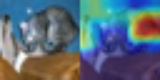

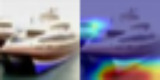

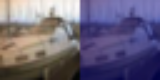

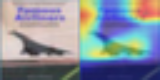

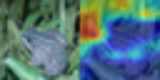

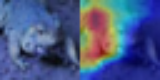

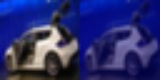

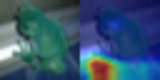

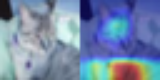

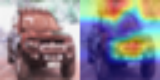

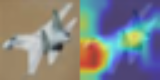

In [0]:
for i in range(cnt):
  combined = np.hstack((org[i], modif[i]))
  combined = cv2.resize(combined,(160,80))
  cv2_imshow(combined)
  print("")

###To avoid Overfitting
* Reduce number of parameters
* Add Dropout
* Add ImgAug (pad, crop, cutout)
* L2 regularization
* Momentum
* Learning Rate
